In [10]:
#Лабораторна робота №6 Масалітін Ілля Вадимович ФІТ 4-8

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.5558915986952442
R^2 Score: 0.575787706032451


In [13]:
y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MSE: {train_mse}, Train R^2: {train_r2}")


Train MSE: 0.5179331255246699, Train R^2: 0.6125511913966952


In [14]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Ridge CV MSE:", -ridge_cv_scores.mean())

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Lasso CV MSE:", -lasso_cv_scores.mean())



Ridge CV MSE: 0.5192653140005429
Lasso CV MSE: 0.6720927784211498


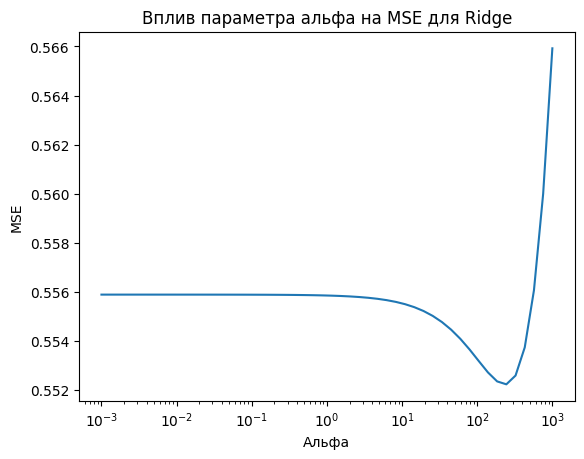

In [15]:
import matplotlib.pyplot as plt
import numpy as np

alphas = np.logspace(-3, 3, 50)

ridge_errors = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_errors.append(mean_squared_error(y_test, ridge_pred))

plt.plot(alphas, ridge_errors)
plt.xscale('log')
plt.title('Вплив параметра альфа на MSE для Ridge')
plt.xlabel('Альфа')
plt.ylabel('MSE')
plt.show()

In [ ]:
#Регресійна модель з регуляризацією забезпечила кращі результати ніж базова модель.

In [16]:
#2

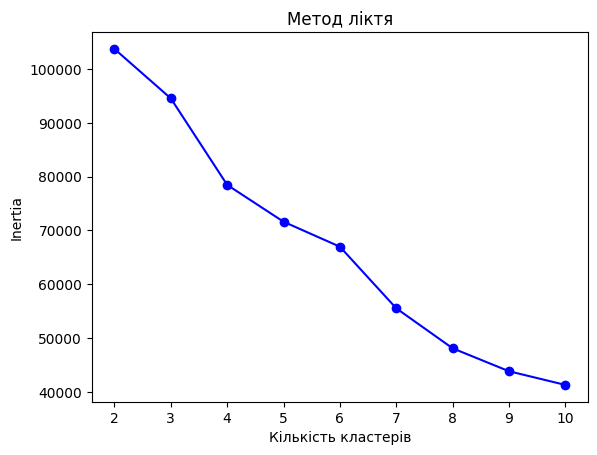

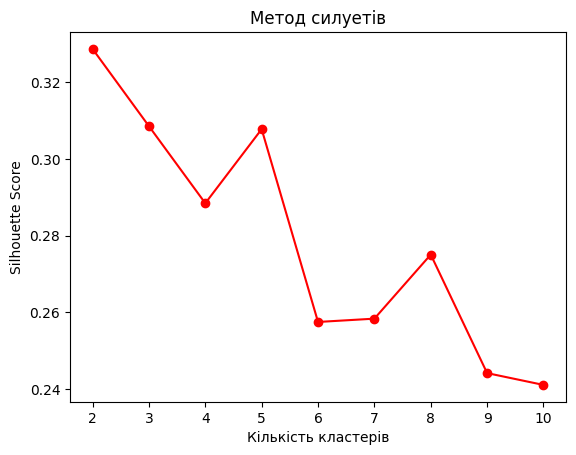

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

plt.plot(k_range, inertia, 'bo-')
plt.title("Метод ліктя")
plt.xlabel("Кількість кластерів")
plt.ylabel("Inertia")
plt.show()

plt.plot(k_range, silhouette_scores, 'ro-')
plt.title("Метод силуетів")
plt.xlabel("Кількість кластерів")
plt.ylabel("Silhouette Score")
plt.show()


In [ ]:
#Висновки: Кластеризація з використанням методу ліктя та силуетів допомагає визначити оптимальну кількість кластерів.